# Анализ данных о продажах игра для интернет-магазина «Стримчик» 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [132]:
#импортируем библиотеки для работы
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
from numpy import nan
from tqdm import tqdm
import warnings
from scipy.stats import pearsonr

In [2]:
#читаем файл
try:
    
    data = pd.read_csv('C:/Users/MiPro/Desktop/python/python/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')    

## Шаг 2. Подготовьте данные

* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости:
* Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
* Опишите причины, которые могли привести к пропускам;
* Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей.  Отдельно разберите это значение и опишите, как его обработать;
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [3]:
#посмотрим на данные
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#переименуем столбцы
data.rename(columns = {'Name' : 'name', 'Platform' : 'platform', 'Year_of_Release' : 'year_of_release', 
                    'Genre' : 'genre', 'NA_sales' : 'na_sales', 'EU_sales' : 'eu_sales', 
                     'JP_sales' : 'jp_sales', 'Other_sales' : 'other_sales', 'Critic_Score' : 'critic_score', 
                     'Rating' : 'rating', 'User_Score' : 'user_score'                   
                    }, inplace = True)

In [5]:
#немного есть ошибки в именнах, поправили. регистр менять нет смысла
unique_name = data.sort_values('name')['name'].unique()
for i in unique_name:
    print(i)

for i in range(len(data['name'])):
    if data.loc[i,'name'] == ' Beyblade Burst':
        data.loc[i,'name'] = 'Beyblade Burst'
    if data.loc[i,'name'] == ' Fire Emblem Fates':
        data.loc[i,'name'] = 'Fire Emblem Fates'
    if data.loc[i,'name'] == " Frozen: Olaf's Quest":
        data.loc[i,'name'] = "Frozen: Olaf's Quest"
    if data.loc[i,'name'] == ' Haikyu!! Cross Team Match!':
        data.loc[i,'name'] = 'Haikyu!! Cross Team Match!'
    if data.loc[i,'name'] == ' Tales of Xillia 2':
        data.loc[i,'name'] = 'Tales of Xillia 2'
    if data.loc[i,'name'] == "'98 Koshien":
        data.loc[i,'name'] = '98 Koshien'


 Beyblade Burst
 Fire Emblem Fates
 Frozen: Olaf's Quest
 Haikyu!! Cross Team Match!
 Tales of Xillia 2
'98 Koshien
.hack//G.U. Vol.1//Rebirth
.hack//G.U. Vol.2//Reminisce
.hack//G.U. Vol.2//Reminisce (jp sales)
.hack//G.U. Vol.3//Redemption
.hack//Infection Part 1
.hack//Link
.hack//Mutation Part 2
.hack//Outbreak Part 3
.hack//Quarantine Part 4: The Final Chapter
.hack: Sekai no Mukou ni + Versus
007 Racing
007: Quantum of Solace
007: The World is not Enough
007: Tomorrow Never Dies
1 vs. 100
1/2 Summer +
10 Minute Solution
100 All-Time Favorites
100 Classic Books
100 Classic Games
1000 Cooking Recipes from ELLE à table
1001 Touch Games
101-in-1 Explosive Megamix
101-in-1 Party Megamix Wii
101-in-1 Sports Megamix
101-in-1 Sports Party Megamix
1080°: TenEighty Snowboarding
11eyes: CrossOver
12-Sai. Honto no Kimochi
12-Sai. Koisuru Diary
12Riven: The Psi-Climinal of Integral
15 Days
1701 A.D.
18 Wheeler: American Pro Trucker
18 Wheels of Steel: Extreme Trucker
18 Wheels of Steel: Extre

Detana TwinBee Yahho! Deluxe Pack
Detective Barbie: The Mystery Cruise
Detective Conan: Marionette Symphony
Detective Conan: Phantom Rhapsody
Detective Conan: Prelude from the Past
Detective Jinguuji Saburo: Ronde Revenge
Detective Opera: Milky Holmes 2
Deus Ex
Deus Ex: Human Revolution
Deus Ex: Invisible War
Deus Ex: Mankind Divided
Deus Ex: The Conspiracy
Devil Dice
Devil Kings
Devil May Cry
Devil May Cry 2
Devil May Cry 3: Dante's Awakening
Devil May Cry 3: Dante's Awakening Special Edition
Devil May Cry 4
Devil May Cry HD Collection
Devil Survivor: Over Clock
Devil's Third
Dewy's Adventure
Dexter's Lab Chess Challenge
Dexter's Laboratory Deesaster Strikes
Di-Gata Defenders
DiRT
DiRT 2
DiRT 3
DiRT Rally
DiRT Showdown
Diablo
Diablo II
Diablo II: Lord of Destruction
Diablo III
Diabolik Lovers
Diabolik Lovers: Dark Fate
Diabolik Lovers: Lunatic Parade
Diabolik Lovers: More Blood
Diabolik Lovers: Vandead Carnival
Diary Girl
Diddy Kong Racing
Diddy Kong Racing DS
Die Hard Trilogy
Die Har

Jane's Hotel
Jawbreaker
Jaws Unleashed
Jaws: Ultimate Predator
Jeanne d'Arc
Jeep Thrills
Jelly Belly: Ballistic Beans
Jenga World Tour
Jeopardy!
Jeopardy! 2nd Edition
Jeremy McGrath Supercross 2000
Jeremy McGrath Supercross 98
Jeremy McGrath Supercross World
Jerry Rice and Nitus' Dog Football
Jersey Devil
Jet Force Gemini
Jet Grind Radio
Jet Impulse
Jet Li: Rise to Honor
Jet Moto
Jet Moto 2
Jet Moto 3
Jet X20
Jewel Legends: Tree of Life
Jewel Link Chronicles: Legend of Athena
Jewel Link Chronicles: Mountains of Madness
Jewel Master Egypt
Jewel Master: Cradle Of Rome 2
Jewel Master: Cradle of Athena
Jewel Master: Cradle of Persia
Jewel Master: Cradle of Rome
Jewel Match
Jewel Match 2
Jewel Quest 5: The Sleepless Star
Jewel Quest II
Jewel Quest IV: Heritage
Jewel Quest Mysteries
Jewel Quest Mysteries 2: Trail of the Midnight Heart
Jewel Quest Mysteries: Curse of the Emerald Tear
Jewel Quest Solitaire
Jewel Quest: Expeditions
Jewel Time Deluxe
Jewels of the Ages
Jewels of the Tropical Los

NHL 2004
NHL 2005
NHL 2K10
NHL 2K11
NHL 2K3
NHL 2K6
NHL 2K7
NHL 2K8
NHL 2K9
NHL 97
NHL 98
NHL 99
NHL Blades of Steel '99
NHL Blades of Steel 2000
NHL Breakaway 98
NHL Breakaway 99
NHL Championship 2000
NHL FaceOff
NHL FaceOff '97
NHL FaceOff 2000
NHL FaceOff 2001
NHL FaceOff 2003
NHL FaceOff 98
NHL FaceOff 99
NHL Hitz 20-02
NHL Hitz 20-03
NHL Hitz Pro
NHL Legacy
NHL Open Ice
NHL Powerplay '96
NHL Powerplay 98
NHL Rivals 2004
NHL Rock the Rink
NHL Slapshot
NHRA Championship Drag Racing
NHRA Drag Racing: Countdown to the Championship
NOëL: La Neige
NOëL: NOT DiGITAL
NPPL: Championship Paintball 2009
NTRA Breeders' Cup World Thoroughbred Championships
Nacho Libre
Nagano Winter Olympics '98
Nagano Winter Olympics 98
Nakayoshi All-Stars: Mezase Gakuen Idol
Namco Classic Fighter Collection
Namco Museum
Namco Museum 50th Anniversary (JP sales)
Namco Museum 64
Namco Museum Battle Collection
Namco Museum Battle Collection (JP sales)
Namco Museum DS
Namco Museum Megamix
Namco Museum Remix
Namco 

Saru! Get You! Pipo Saru Senki
Saru! Get You! SaruSaru Daisakusen
Satisfashion
Satomi Hakkenden: Hachi Tamanoki
Saturday Night Slam Masters
Saturday Night Speedway
Saturn Bomberman
Savage Skies
Saw II: Flesh & Blood
Scaler
Scared Rider Xechs
Scarface: Money. Power. Respect.
Scarface: The World is Yours
Scarlett: Nichijou no Kyoukaisen
Scene It? Box Office Smash
Scene It? Bright Lights! Big Screen!
Scene It? Lights Camera Action
Scene It? Twilight
Schlag den Raab
School Days LxH
Science Papa
Scooby Doo and the Cyber Chase
Scooby-Doo
Scooby-Doo 2: Monsters Unleashed
Scooby-Doo and the Cyber Chase
Scooby-Doo! Classic Creep Capers
Scooby-Doo! First Frights
Scooby-Doo! Mystery Mayhem
Scooby-Doo! Night of 100 Frights
Scooby-Doo! Unmasked
Scooby-Doo! Who's Watching Who?
Scooby-Doo! and the Spooky Swamp
Scrabble
Scrabble (Others sales)
Scrabble 2007 Edition
Scrabble Blast!
ScrapLand
Scribblenauts
Scribblenauts Unmasked: A DC Comics Adventure
Scribblenauts: Unlimited
Scripps Spelling Bee
Scurge

WarTech: Senko no Ronde
Warcraft II: Tides of Darkness
Warcraft III: Reign of Chaos
Warcraft III: The Frozen Throne
Warcraft: Orcs & Humans
Warhammer 40,000: Dawn of War
Warhammer 40,000: Dawn of War II
Warhammer 40,000: Dawn of War II - Chaos Rising
Warhammer 40,000: Dawn of War II - Retribution
Warhammer 40,000: Dawn of War: Soulstorm
Warhammer 40,000: Fire Warrior
Warhammer 40,000: Space Marine
Warhammer 40,000: Squad Command
Warhammer Online: Age of Reckoning
Warhammer: Battle For Atluma
Warhammer: Battle March
Warhammer: Dark Omen
Warhammer: Mark of Chaos
Warhammer: Shadow of the Horned Rat
Warhammer: The End Times - Vermintide
Warhawk
Wario Land 3
Wario Land 4
Wario Land II
Wario Land II (GBC)
Wario Land: Shake It!
Wario World
Wario: Master of Disguise
WarioWare D.I.Y.
WarioWare Touched!
WarioWare, Inc.: Mega MicroGame$
WarioWare, Inc.: Mega Party Game$
WarioWare: Smooth Moves
WarioWare: Twisted!
Warpath: Jurassic Park
Warriors Orochi
Warriors Orochi 2
Warriors Orochi 2 (JP sales

In [6]:
data[data.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [137]:
#посмотрим что за переменные
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     9099 non-null   float64
 9   user_score       8690 non-null   float64
 10  rating           10387 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


In [8]:
print(data.sort_values('platform')['platform'].unique())
print(data.sort_values('year_of_release')['year_of_release'].unique())
print(data.sort_values('genre')['genre'].unique())
print(data.sort_values('critic_score')['critic_score'].unique())
print(data.sort_values('user_score')['user_score'].unique())
print(data.sort_values('rating')['rating'].unique())

['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']
[1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016.   nan]
['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy' nan]
[13. 17. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. nan]
['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1'

In [9]:
for i in range(len(data['name'])):
    if data.loc[i,'user_score'] == 'tbd':
        data.loc[i,'user_score'] = np.nan
data = data.astype({'user_score': float}, errors = 'ignore')

In [10]:
data = data.dropna(subset=['name'])
data = data.reset_index(drop=True)

In [11]:
nan_data = data.pivot_table(index='name')

nan_data['rating'] = np.nan
m=0
for i in tqdm(data['name']):
    if (pd.isna(data.loc[m,'rating'])) == False:
        nan_data.loc[i,'rating'] = data.loc[m,'rating']
    m += 1
    
#nan_data['name'] = nan_data.index
#nan_data = nan_data.reset_index(drop=True)
                

100%|█████████████████████████████████████████████████████████████████████████| 16713/16713 [00:01<00:00, 13024.98it/s]


In [12]:
nan_data.head(10)

,critic_score,eu_sales,jp_sales,na_sales,other_sales,user_score,year_of_release,rating
name,,,,,,,,
.hack//G.U. Vol.1//Rebirth,NaN,0.00,0.17,0.00,0.00,NaN,2006.0,NaN
.hack//G.U. Vol.2//Reminisce,NaN,0.09,0.00,0.11,0.03,NaN,2006.0,NaN
.hack//G.U. Vol.2//Reminisce (jp sales),NaN,0.00,0.16,0.00,0.00,NaN,2006.0,NaN
.hack//G.U. Vol.3//Redemption,NaN,0.00,0.17,0.00,0.00,NaN,2007.0,NaN
.hack//Infection Part 1,75.0,0.38,0.26,0.49,0.13,8.5,2002.0,T
.hack//Link,NaN,0.00,0.14,0.00,0.00,NaN,2010.0,NaN
.hack//Mutation Part 2,76.0,0.18,0.20,0.23,0.06,8.9,2002.0,T
.hack//Outbreak Part 3,70.0,0.11,0.17,0.14,0.04,8.7,2002.0,T
.hack//Quarantine Part 4: The Final Chapter,NaN,0.07,0.00,0.09,0.02,NaN,2003.0,NaN


In [13]:
m = 0
for i in tqdm(data['name']):
    if pd.isna(data.loc[m,'year_of_release']) == True:
        data.loc[m,'year_of_release'] = nan_data.loc[i,'year_of_release']
    #123 замен пропусков годе релиза
    if pd.isna(data.loc[m,'critic_score']) == True:
        data.loc[m,'critic_score'] = nan_data.loc[i,'critic_score']
    #0 замены пропусков в оценке критиков
    if pd.isna(data.loc[m,'user_score']) == True:
        data.loc[m,'user_score'] = nan_data.loc[i,'user_score'] 
    #1099 замены пропусков в оценке пользователей
    if pd.isna(data.loc[m,'rating']) == True:
        data.loc[m,'rating'] = nan_data.loc[i,'rating']
    #437 замены пропусков в рейтинге
    m += 1

#Некторые года получились дробные, поправим
for i in range(len(data['year_of_release'])):
    if pd.isna(data.loc[i,'year_of_release']) == False:
        data.loc[i,'year_of_release'] = int(data.loc[i,'year_of_release'])
        


100%|██████████████████████████████████████████████████████████████████████████| 16713/16713 [00:03<00:00, 5087.21it/s]


In [14]:
for i in range(len(data['year_of_release'])):
    data.loc[i,'total_sales'] = data.loc[i,'na_sales'] + \
    data.loc[i,'eu_sales'] + data.loc[i,'jp_sales'] + \
    data.loc[i,'other_sales']

## Шаг 3. Проведите исследовательский анализ данных

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

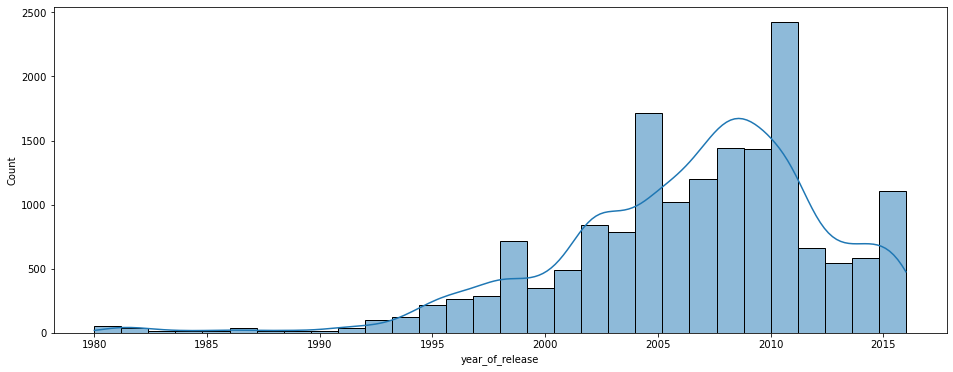

In [15]:
plt.figure(figsize=(16, 6))
sns.histplot(data=data, x="year_of_release", kde=True, bins=30);

C:\Users\MiPro\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\MiPro\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\MiPro\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\MiPro\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\MiPro\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance

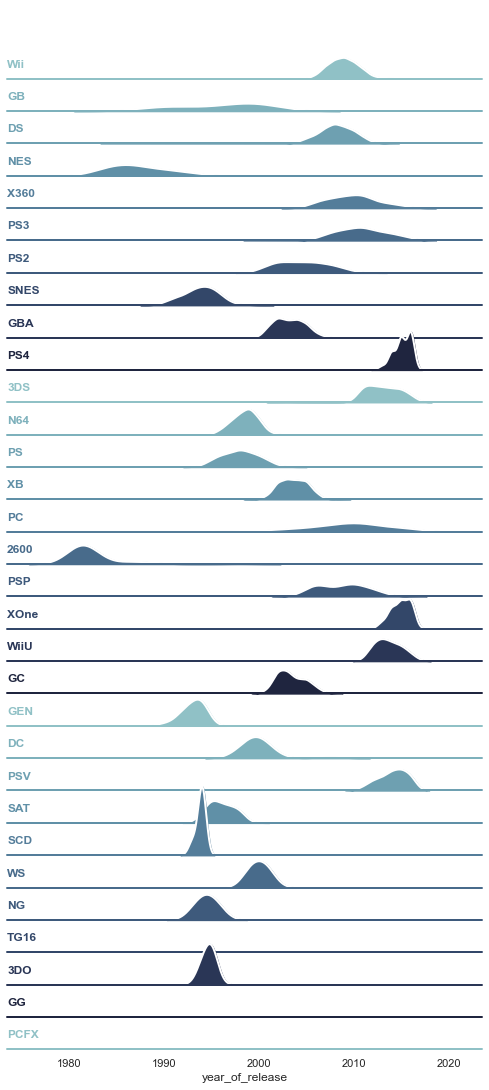

In [93]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data, row="platform", hue="platform", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "year_of_release",
      bw_adjust=1.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "year_of_release", clip_on=False, color="w", lw=2, bw_adjust=1.5)

# passing color=None to refline() uses the hue mapping

g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "year_of_release")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.55)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True);

#чтобы ворнинги убрать
warnings.filterwarnings("ignore", category=FutureWarning)

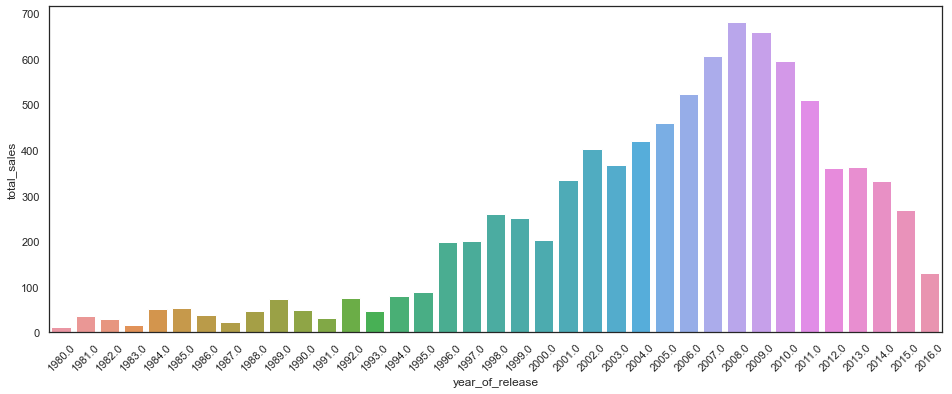

In [17]:
sales_data = data.groupby('year_of_release').agg({'total_sales':'sum'})
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.barplot(data=sales_data, x=sales_data.index, y="total_sales");


In [18]:
good_data = data.loc[0:2,:] 
m=0
for i in range(len(data['year_of_release'])):
    if (data.loc[i, 'year_of_release'] > 2005) and (data.loc[i, 'year_of_release'] < 2016):
        good_data.loc[m,:] = data.loc[i,:] 
        m += 1


C:\Users\MiPro\AppData\Local\Temp\ipykernel_4884\3530697615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data.loc[m,:] = data.loc[i,:]


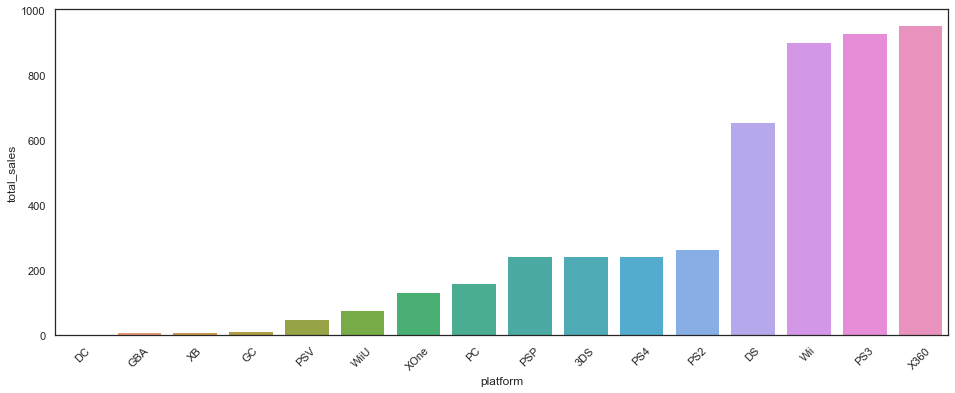

In [19]:
sales_data = good_data.groupby('platform').agg({'total_sales':'sum'})
sales_data = sales_data.sort_values('total_sales')
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.barplot(data=sales_data, x=sales_data.index, y="total_sales");

In [92]:
drop_list = []
good_data2 = good_data.loc[0:3,:] 
for i in sales_data.index:
    if sales_data.loc[i,'total_sales'] > 50:
        drop_list.append(i)
m=0
for i in range(len(good_data['platform'])):
    if good_data.loc[i, 'platform'] in drop_list:
        good_data2.loc[m,:] = good_data.loc[i,:] 
        m += 1

C:\Users\MiPro\AppData\Local\Temp\ipykernel_4884\1825591864.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data2.loc[m,:] = good_data.loc[i,:]


In [31]:
platform_data = good_data2.pivot_table(index='year_of_release', columns = 'platform', values = 'total_sales', aggfunc='sum')
platform_data = platform_data.fillna(0)
platform_data 

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2006.0,0.00,119.81,2.85,103.99,20.96,0.00,56.28,140.19,0.00,51.79,0.00
2007.0,0.00,147.23,9.28,76.10,73.19,0.00,47.30,153.41,0.00,95.41,0.00
2008.0,0.00,145.36,12.46,53.90,118.79,0.00,36.76,177.68,0.00,136.07,0.00
2009.0,0.00,119.56,17.05,26.40,130.93,0.00,37.78,206.97,0.00,120.82,0.00
2010.0,0.30,85.35,26.15,5.64,142.96,0.00,35.04,128.67,0.00,170.55,0.00
2011.0,63.20,26.33,35.16,0.45,157.98,0.00,17.82,59.79,0.00,145.23,0.00
2012.0,51.76,11.67,23.45,0.00,108.28,0.00,7.95,22.94,17.56,100.72,0.00
2013.0,56.57,1.54,13.01,0.00,113.25,25.99,3.38,8.59,21.65,88.58,18.96
2014.0,43.76,0.00,13.28,0.00,47.76,100.00,0.24,3.75,22.03,34.74,54.07


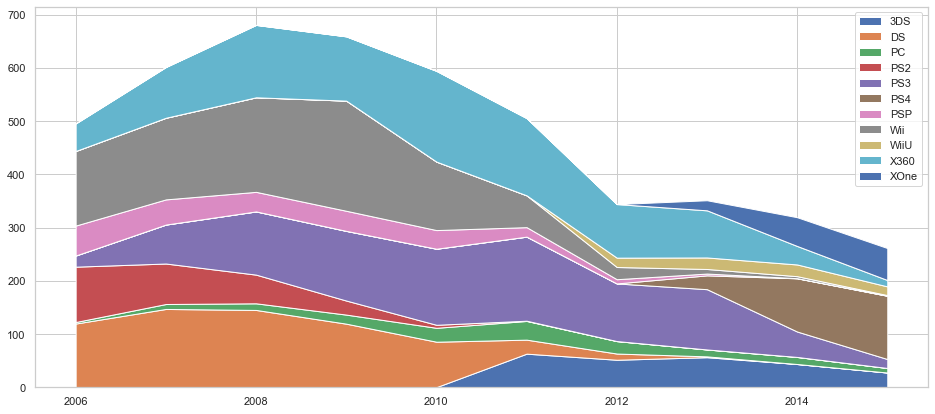

In [90]:
plt.figure(figsize=(16, 7))
y = np.vstack([platform_data['3DS'], platform_data['DS'], platform_data['PC'], 
               platform_data['PS2'], platform_data['PS3'], platform_data['PS4'], platform_data['PSP'], 
               platform_data['Wii'], platform_data['WiiU'], platform_data['X360'], platform_data['XOne']])

plt.stackplot(platform_data.index, y, labels=['3DS', 'DS', 'PC', 'PS2', 'PS3', 'PS4', 'PSP', 'Wii', 'WiiU',
                                              'X360', 'XOne'])
plt.legend(loc='upper right')
plt.show()


<AxesSubplot:xlabel='platform', ylabel='year_of_release'>

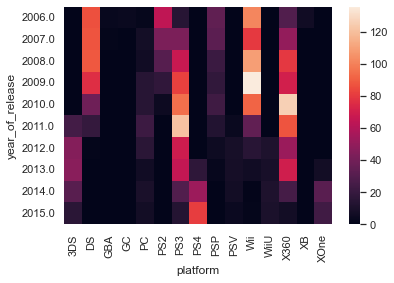

In [109]:
sns.heatmap(platform_data)

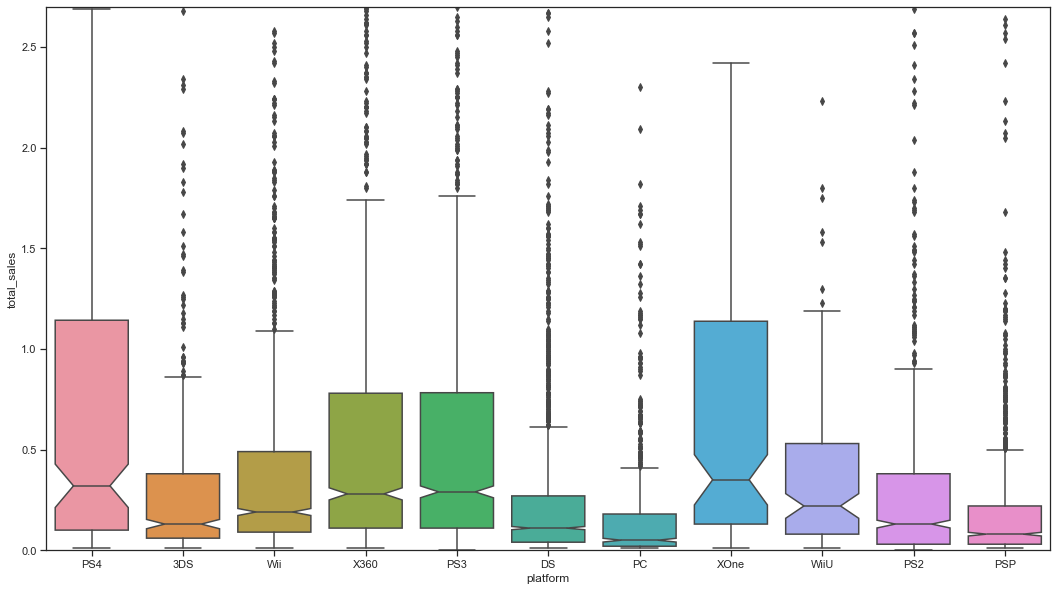

In [159]:
fig, ax1 = plt.subplots(figsize=(18, 10))
g = sns.boxplot(y=good_data2['total_sales'], x=good_data2['platform'], data=good_data2, ax=ax1, notch=True);
g.set(ylim=(0, 2.7));

In [126]:
drop_list = ['3DS', 'PC', 'PS4', 'WiiU', 'XOne']
good_data3 = good_data2.loc[0:3,['platform','total_sales', 'user_score', 'critic_score']] 
m=0
for i in range(len(good_data2['platform'])):
    if good_data2.loc[i, 'platform'] in drop_list:
        good_data3.loc[m,:] = good_data2.loc[i,:] 
        m += 1

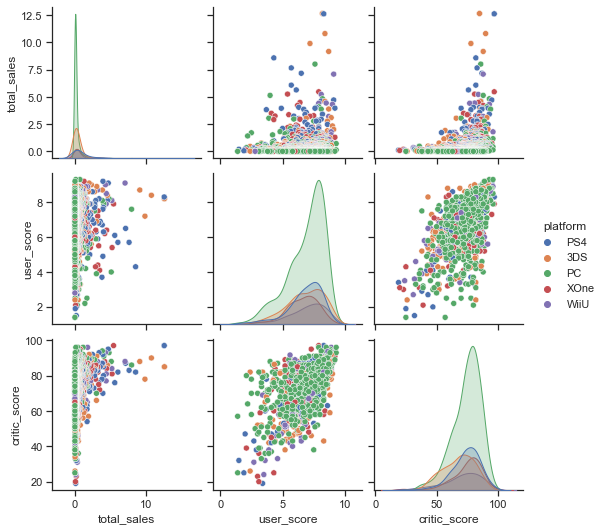

In [133]:
sns.set_theme(style="ticks")

sns.pairplot(good_data3, hue="platform")

In [138]:
good_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             9407 non-null   object 
 1   platform         9407 non-null   object 
 2   year_of_release  9407 non-null   float64
 3   genre            9407 non-null   object 
 4   na_sales         9407 non-null   float64
 5   eu_sales         9407 non-null   float64
 6   jp_sales         9407 non-null   float64
 7   other_sales      9407 non-null   float64
 8   critic_score     5237 non-null   float64
 9   user_score       5127 non-null   float64
 10  rating           6348 non-null   object 
 11  total_sales      9407 non-null   float64
dtypes: float64(8), object(4)
memory usage: 882.0+ KB


Коэффициент корреляции: 0.33, статистичекая значимость: 0.0


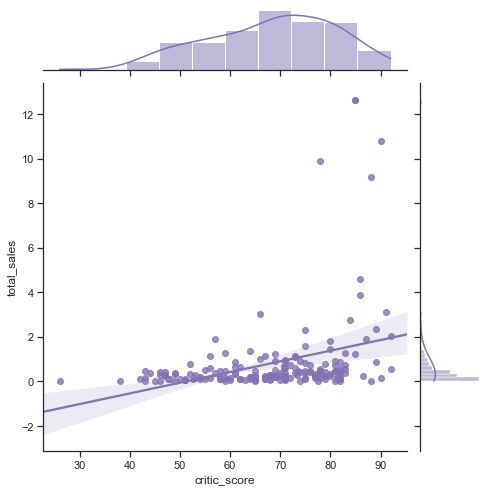

In [146]:
good_data4 = good_data3.dropna()
good_data4 = good_data4[good_data4['platform'] == '3DS']
sns.jointplot(y="total_sales", x="critic_score", data=good_data4,  
                  kind="reg", truncate=False,
                  color="m", height=7);
corr, p = pearsonr(good_data4['critic_score'], good_data4['total_sales'])
print(f'Коэффициент корреляции: {round(corr, 2)}, статистичекая значимость: {round(p,3)}')

Коэффициент корреляции: 0.29, статистичекая значимость: 0.0


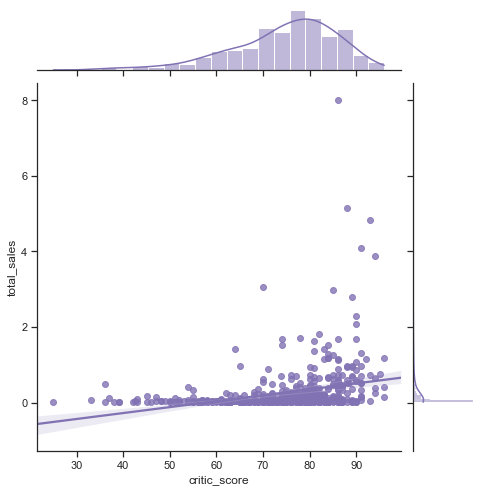

In [147]:
good_data4 = good_data3.dropna()
good_data4 = good_data4[good_data4['platform'] == 'PC']
sns.jointplot(y="total_sales", x="critic_score", data=good_data4,  
                  kind="reg", truncate=False,
                  color="m", height=7);
corr, p = pearsonr(good_data4['critic_score'], good_data4['total_sales'])
print(f'Коэффициент корреляции: {round(corr, 2)}, статистичекая значимость: {round(p,3)}')

Коэффициент корреляции: 0.42, статистичекая значимость: 0.0


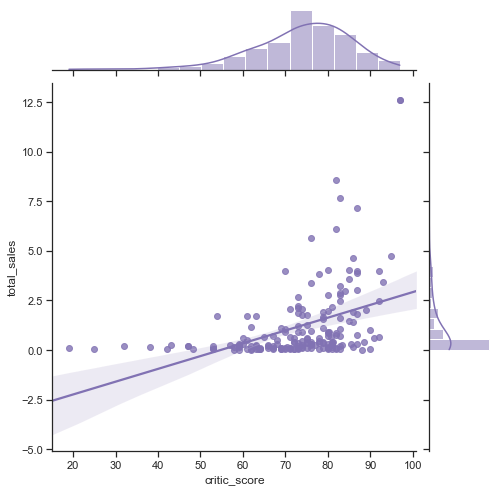

In [151]:
good_data4 = good_data3.dropna()
good_data4 = good_data4[good_data4['platform'] == 'PS4']
sns.jointplot(y="total_sales", x="critic_score", data=good_data4,  
                  kind="reg", truncate=False,
                  color="m", height=7);
corr, p = pearsonr(good_data4['critic_score'], good_data4['total_sales'])
print(f'Коэффициент корреляции: {round(corr, 2)}, статистичекая значимость: {round(p,3)}')

Коэффициент корреляции: 0.33, статистичекая значимость: 0.001


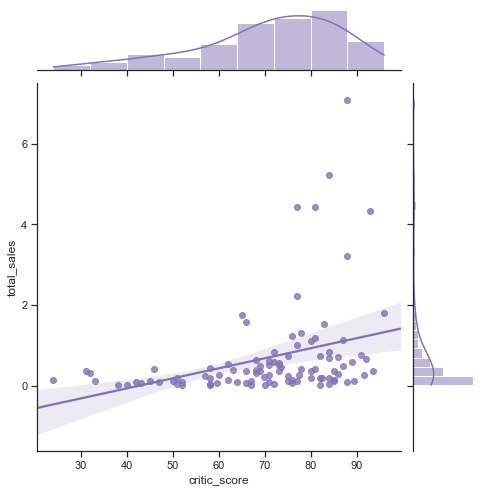

In [152]:
good_data4 = good_data3.dropna()
good_data4 = good_data4[good_data4['platform'] == 'WiiU']
sns.jointplot(y="total_sales", x="critic_score", data=good_data4,  
                  kind="reg", truncate=False,
                  color="m", height=7);
corr, p = pearsonr(good_data4['critic_score'], good_data4['total_sales'])
print(f'Коэффициент корреляции: {round(corr, 2)}, статистичекая значимость: {round(p,3)}')

Коэффициент корреляции: 0.38, статистичекая значимость: 0.0


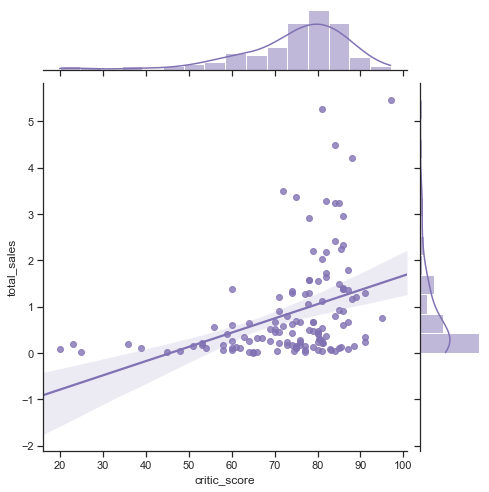

In [153]:
good_data4 = good_data3.dropna()
good_data4 = good_data4[good_data4['platform'] == 'XOne']
sns.jointplot(y="total_sales", x="critic_score", data=good_data4,  
                  kind="reg", truncate=False,
                  color="m", height=7);
corr, p = pearsonr(good_data4['critic_score'], good_data4['total_sales'])
print(f'Коэффициент корреляции: {round(corr, 2)}, статистичекая значимость: {round(p,3)}')

Коэффициент корреляции: 0.24, статистичекая значимость: 0.001


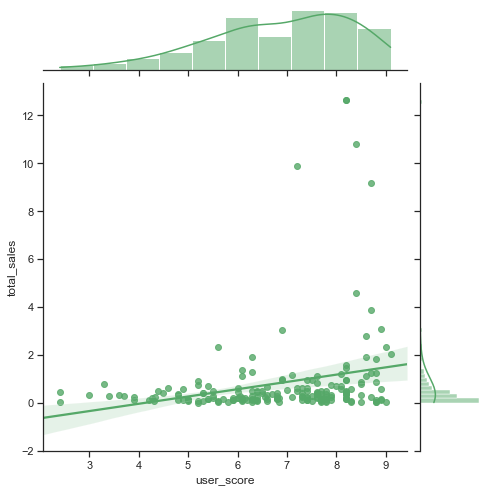

In [154]:
good_data4 = good_data3.dropna()
good_data4 = good_data4[good_data4['platform'] == '3DS']
sns.jointplot(y="total_sales", x="user_score", data=good_data4,  
                  kind="reg", truncate=False,
                  color="g", height=7);
corr, p = pearsonr(good_data4['user_score'], good_data4['total_sales'])
print(f'Коэффициент корреляции: {round(corr, 2)}, статистичекая значимость: {round(p,3)}')


Коэффициент корреляции: -0.03, статистичекая значимость: 0.465


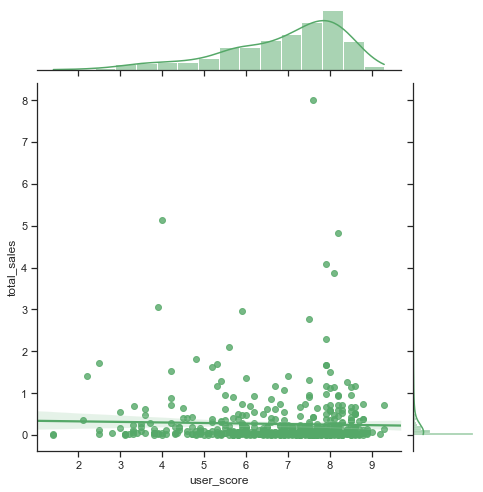

In [155]:
good_data4 = good_data3.dropna()
good_data4 = good_data4[good_data4['platform'] == 'PC']
sns.jointplot(y="total_sales", x="user_score", data=good_data4,  
                  kind="reg", truncate=False,
                  color="g", height=7);
corr, p = pearsonr(good_data4['user_score'], good_data4['total_sales'])
print(f'Коэффициент корреляции: {round(corr, 2)}, статистичекая значимость: {round(p,3)}')


Коэффициент корреляции: 0.05, статистичекая значимость: 0.505


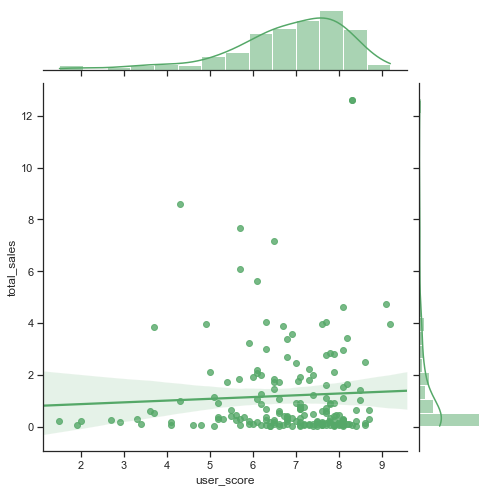

In [156]:
good_data4 = good_data3.dropna()
good_data4 = good_data4[good_data4['platform'] == 'PS4']
sns.jointplot(y="total_sales", x="user_score", data=good_data4,  
                  kind="reg", truncate=False,
                  color="g", height=7);
corr, p = pearsonr(good_data4['user_score'], good_data4['total_sales'])
print(f'Коэффициент корреляции: {round(corr, 2)}, статистичекая значимость: {round(p,3)}')


Коэффициент корреляции: 0.38, статистичекая значимость: 0.0


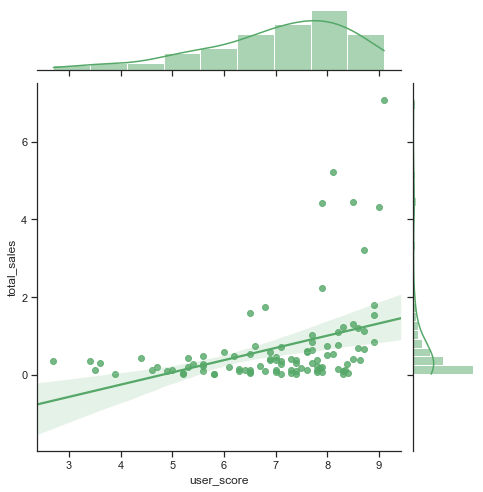

In [157]:
good_data4 = good_data3.dropna()
good_data4 = good_data4[good_data4['platform'] == 'WiiU']
sns.jointplot(y="total_sales", x="user_score", data=good_data4,  
                  kind="reg", truncate=False,
                  color="g", height=7);
corr, p = pearsonr(good_data4['user_score'], good_data4['total_sales'])
print(f'Коэффициент корреляции: {round(corr, 2)}, статистичекая значимость: {round(p,3)}')


Коэффициент корреляции: -0.06, статистичекая значимость: 0.469


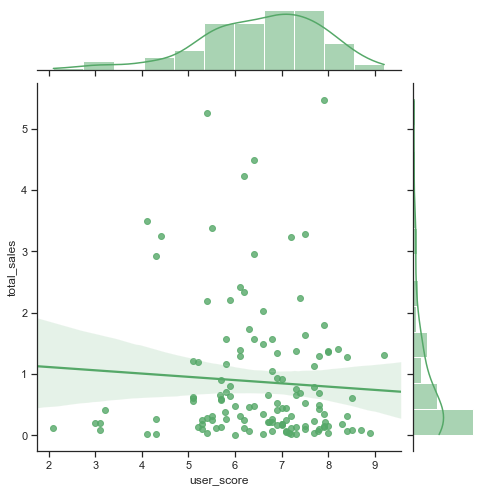

In [158]:
good_data4 = good_data3.dropna()
good_data4 = good_data4[good_data4['platform'] == 'XOne']
sns.jointplot(y="total_sales", x="user_score", data=good_data4,  
                  kind="reg", truncate=False,
                  color="g", height=7);
corr, p = pearsonr(good_data4['user_score'], good_data4['total_sales'])
print(f'Коэффициент корреляции: {round(corr, 2)}, статистичекая значимость: {round(p,3)}');


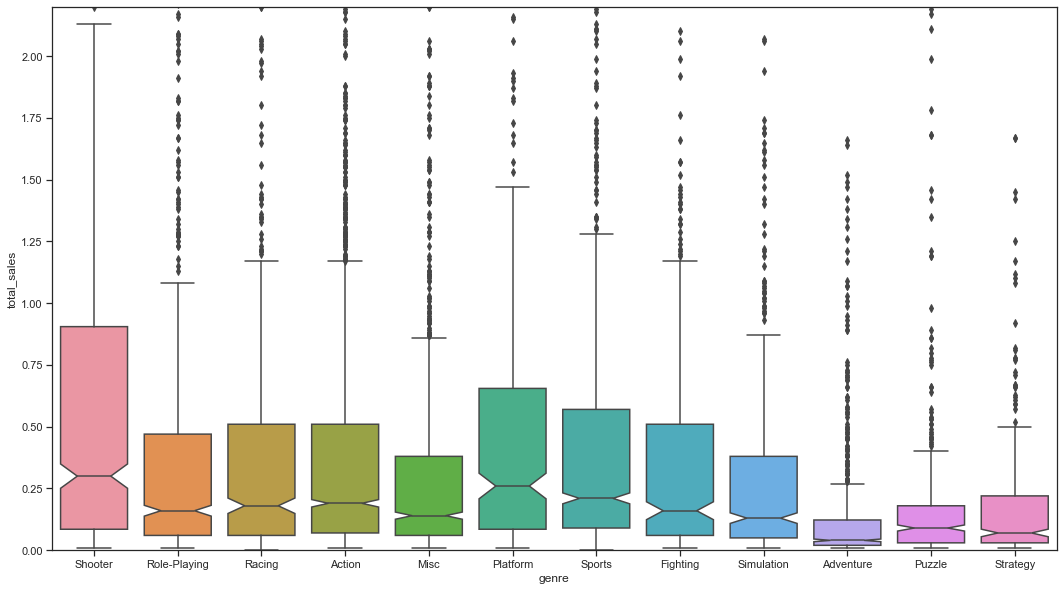

In [162]:
fig, ax1 = plt.subplots(figsize=(18, 10))
g = sns.boxplot(y=good_data2['total_sales'], x=good_data2['genre'], data=good_data2, ax=ax1, notch=True);
g.set(ylim=(0, 2.2));

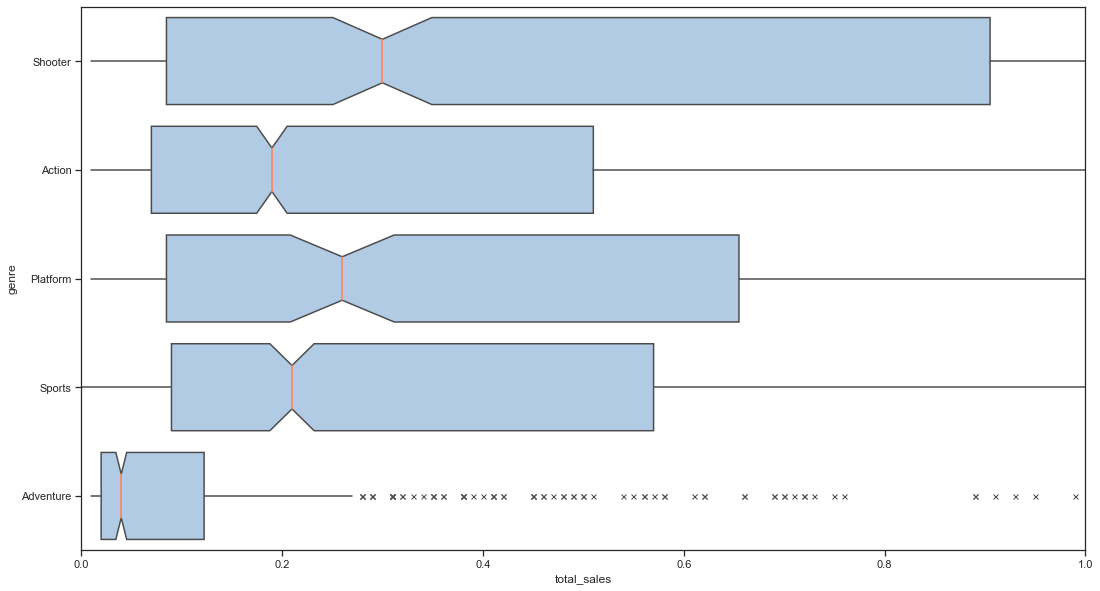

In [171]:
fig, ax1 = plt.subplots(figsize=(18, 10))
g=sns.boxplot(
    data=good_data2[(good_data2['genre'] == 'Shooter') | (good_data2['genre'] == 'Platform')
    | (good_data2['genre'] == 'Sports') | (good_data2['genre'] == 'Action') | (good_data2['genre'] == 'Adventure')], 
    x="total_sales", y="genre",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
    
)
g.set(xlim=(0,1));

## Шаг 4. Составьте портрет пользователя каждого региона
* Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

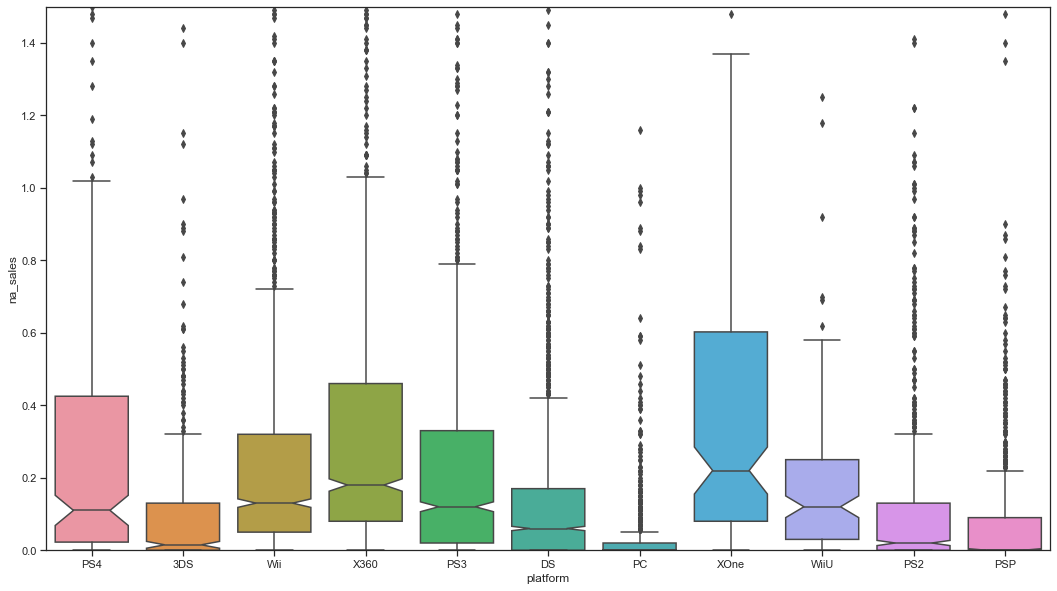

In [180]:
fig, ax1 = plt.subplots(figsize=(18, 10))
g = sns.boxplot(y=good_data2['na_sales'], x=good_data2['platform'], data=good_data2, ax=ax1, notch=True);

g.set(ylim=(0, 1.5));

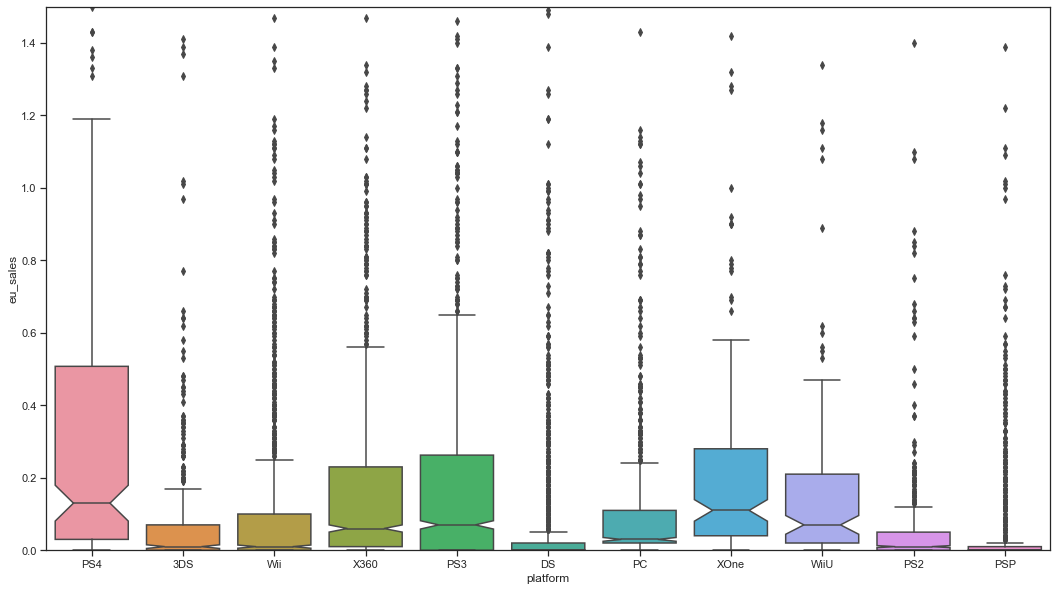

In [176]:
fig, ax1 = plt.subplots(figsize=(18, 10))
g = sns.boxplot(y=good_data2['eu_sales'], x=good_data2['platform'], data=good_data2, ax=ax1, notch=True);
g.set(ylim=(0, 1.5));

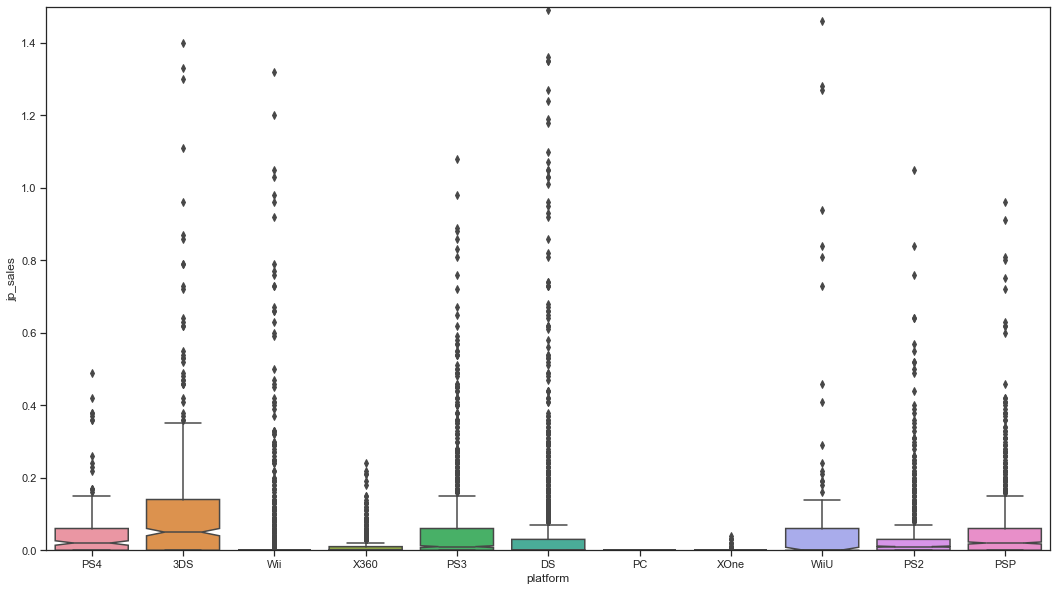

In [177]:
fig, ax1 = plt.subplots(figsize=(18, 10))
g = sns.boxplot(y=good_data2['jp_sales'], x=good_data2['platform'], data=good_data2, ax=ax1, notch=True);
g.set(ylim=(0, 1.5));

In [229]:
portret_data = good_data2.groupby(['platform'], as_index=False).agg({'na_sales': ['sum'], 'eu_sales': ['sum'], 'jp_sales': ['sum']})
portret_data.columns = ['_'.join(col).rstrip('_') for col in portret_data.columns.values]
portret_data = portret_data.fillna(0)
na_sales_sum = portret_data['na_sales_sum'].sum()
eu_sales_sum = portret_data['eu_sales_sum'].sum()
jp_sales_sum = portret_data['jp_sales_sum'].sum()
for i in range(len(portret_data['platform'])):
    portret_data.loc[i,'na_sales_share'] = portret_data.loc[i,'na_sales_sum'] /  na_sales_sum
    portret_data.loc[i,'eu_sales_share'] = portret_data.loc[i,'eu_sales_sum'] /  eu_sales_sum
    portret_data.loc[i,'jp_sales_share'] = portret_data.loc[i,'jp_sales_sum'] /  jp_sales_sum
portret_data


,platform,na_sales_sum,eu_sales_sum,jp_sales_sum,na_sales_share,eu_sales_share,jp_sales_share
0,3DS,89.28,67.34,99.63,0.039511,0.048333,0.193863
1,DS,313.78,134.16,134.99,0.138863,0.096294,0.262667
2,PC,43.96,98.55,0.00,0.019454,0.070734,0.000000
3,PS2,115.16,46.48,36.08,0.050964,0.033361,0.070205
4,PS3,390.93,327.09,78.21,0.173005,0.234769,0.152183
5,PS4,97.24,121.48,10.96,0.043033,0.087192,0.021326
6,PSP,82.36,55.27,71.13,0.036448,0.039670,0.138407
7,Wii,421.30,208.72,58.21,0.186446,0.149809,0.113267
8,WiiU,36.00,23.65,12.34,0.015932,0.016975,0.024012
9,X360,590.78,268.54,12.04,0.261449,0.192745,0.023428


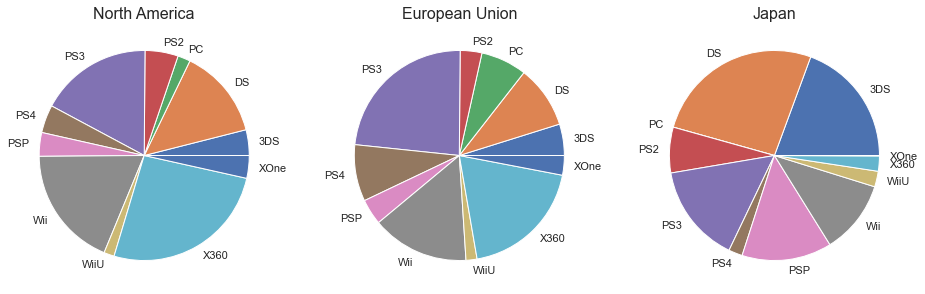

In [214]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

# plot each pie chart in a separate subplot
ax1.pie(portret_data['na_sales_sum'], labels=portret_data['platform'])
ax2.pie(portret_data['eu_sales_sum'], labels=portret_data['platform'])
ax3.pie(portret_data['jp_sales_sum'], labels=portret_data['platform'])
ax1.set_title('North America', fontsize=16)
ax2.set_title('European Union', fontsize=16)
ax3.set_title('Japan', fontsize=16)
plt.show()

In [263]:
portret_data2 = pd.DataFrame({'platform':[''], 'share':[0],'region':['']})
m = 0

for i in range(len(portret_data['platform'])):
    portret_data2.loc[m, ['platform']] = portret_data.loc[i, 'platform']
    portret_data2.loc[m, ['share']] =  portret_data.loc[i, 'na_sales_share']
    portret_data2.loc[m, ['region']] = 'North America'    
    m +=1
    portret_data2.loc[m, ['platform']] = portret_data.loc[i, 'platform']
    portret_data2.loc[m, ['share']] = portret_data.loc[i, 'eu_sales_share']
    portret_data2.loc[m, ['region']] = 'European Union'    
    m +=1
    portret_data2.loc[m, ['platform']] = portret_data.loc[i, 'platform']
    portret_data2.loc[m, ['share']] = portret_data.loc[i, 'jp_sales_share']
    portret_data2.loc[m, ['region']] = 'Japan'    
    m +=1
        

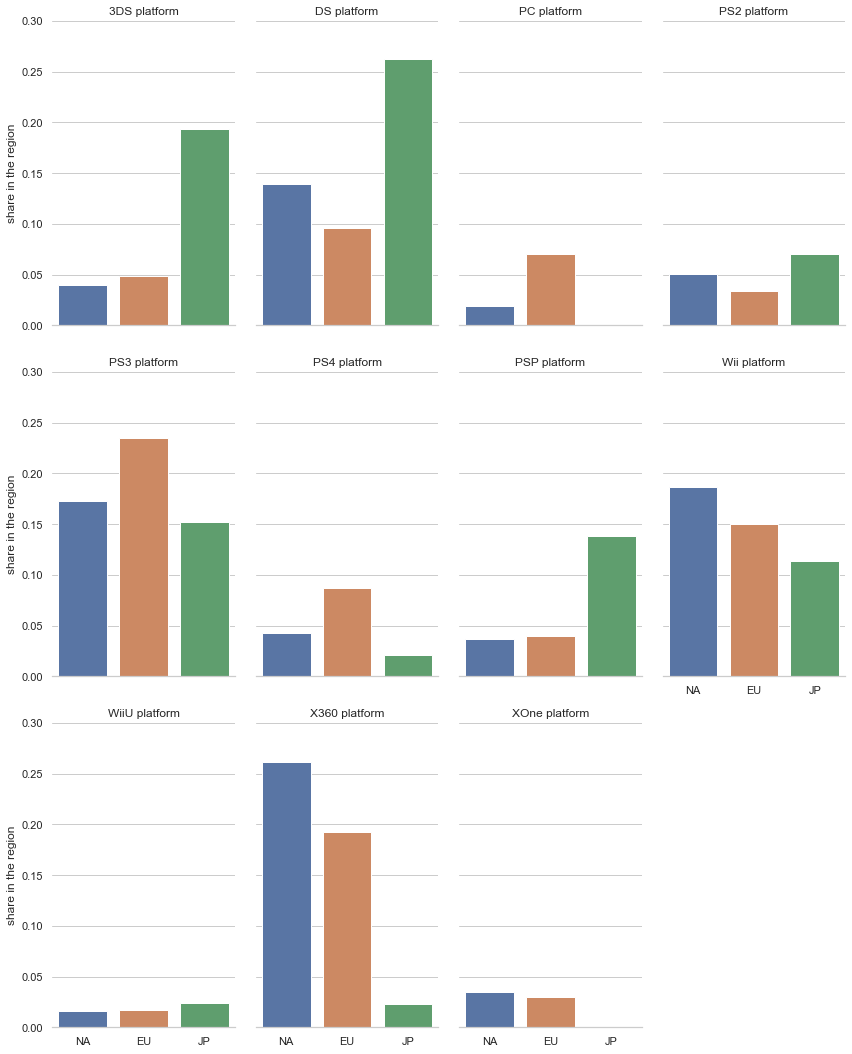

In [262]:
g = sns.catplot(
    data=portret_data2, x="region", y="share", col="platform",
    kind="bar", height=5, aspect=.6, col_wrap=4, dodge=True,
)
g.set_axis_labels("", "share in the region")
g.set_xticklabels(["NA", "EU", "JP"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 0.3))
g.despine(left=True)

In [276]:
portret_data = portret_data.sort_values('na_sales_sum', ascending=False)
print(f'Топ-5 платформ по продажам игр в North America:\n '
      f'
     )

North America'    

European Union'    

Japan'    
    m +=1

Топ-5 платформ по продажам игр:
 ghj


## Шаг 5. Проверьте гипотезы
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
* Задайте самостоятельно пороговое значение alpha.

Поясните:
* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.

## Шаг 6. Напишите общий вывод
Оформление: Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.